# Optimality Conditions for Unconstrained Optimization

### Chapter 2 from [Beck '17]

First, you need to install the `mpmath` and `sympy` packages

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import sympy as sym

**Example: Quadratic Function** Consider 
$f(x,y) = {2x^2-2xy+2y^2-2y+2}$ defined on $\mathbb{R}^2$.

We can write this as a quadratic formula:
$$f(\textbf{x}) = {\textbf{x}^\top\begin{bmatrix} 2 & -1 \\ -1 & 2 \end{bmatrix}\textbf{x}+2\begin{bmatrix} 0 \\ -1\end{bmatrix}^\top\textbf{x}+2}$$

Therefore $f(\textbf{x}) \geq 0$ if and only if 
    $\begin{bmatrix}
        2 & -1 & 0 \\ -1 & 2 & -1 \\ 0 & -1 & 2
    \end{bmatrix}
    \succeq 0$.

We can determine whether or not a matrix is positive semidefinite by looking at its eigenvalues.

In [6]:
# using numpy
x = -1
quadratic_matrix_num = np.array([[648*x**2,-144*x],[-144*x,32]])
np.linalg.eig(quadratic_matrix_num)

(array([680.,   0.]),
 array([[ 0.97618706, -0.21693046],
        [ 0.21693046,  0.97618706]]))

In [8]:
144**2

20736

In [6]:
# using sympy
quadratic_matrix_sym = sym.Matrix([[2,-1,0],[-1,2,-1],[0,-1,2]])
quadratic_matrix_sym.eigenvals()

{2: 1, 2 - sqrt(2): 1, sqrt(2) + 2: 1}

In [7]:
x = np.linspace(-4, 4, 1000)
y = np.linspace(-4, 4, 1000)
xmesh, ymesh = np.meshgrid(x,y)
def f(x):
    return 2*x[0]**-2*x[0]*x[1]+2*x[1]**2-x[1]+2
fmesh = f(np.array([xmesh, ymesh]))

In [8]:
import plotly.graph_objects as go

x,y = np.mgrid[-5:5:100j, -5:5:100j]
z = 2*x**2-2*x*y+2*y**2-y+2

fig = go.Figure()

fig.add_trace(go.Surface(x=x, y=y, z=z, colorbar_x=-0.07, opacity=0.7,cmin= 0,cmax=10))

fig.update_layout(
    scene = dict(
        xaxis = dict(nticks=4, range=[-5,5],),
        yaxis = dict(nticks=4, range=[-5,5],),
        zaxis = dict(nticks=4, range=[-1,9],)),
title_text="Ring cyclide")

fig.update_layout(scene_aspectmode='cube')

fig.show()

**Example: Computing gradient and Hessian** Consider 
$f(x,y)={x+y\over x^2+y^2+1}$ defined on $\mathbb{R}^2$.

In [9]:
x = np.linspace(-4, 4, 1000)
y = np.linspace(-4, 4, 1000)
xmesh, ymesh = np.meshgrid(x,y)
def f(x):
    return (x[0]+x[1])/(x[0]**2+x[1]**2+1)
fmesh = f(np.array([xmesh, ymesh]))

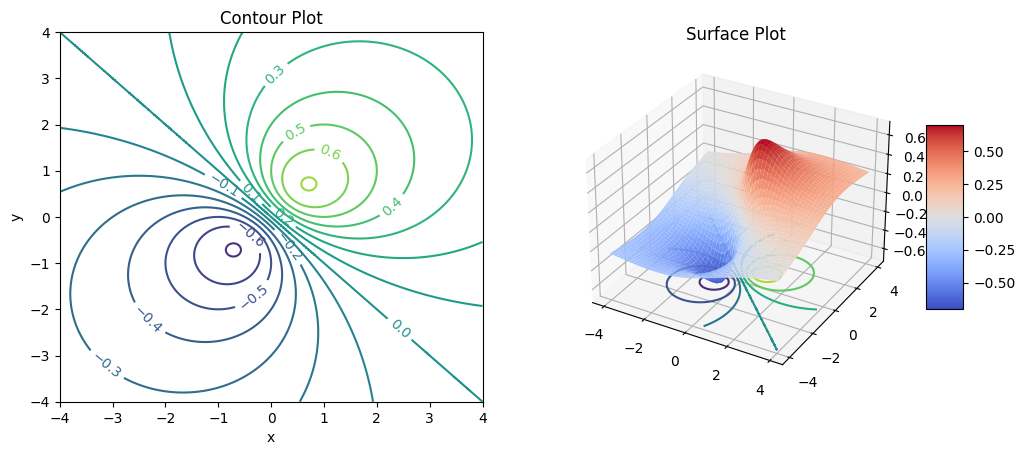

In [10]:
# set up a figure height/width = 0.4
fig = plt.figure(figsize=plt.figaspect(0.4))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax1 = fig.add_subplot(1, 2, 1)

#left, bottom, width, height = 0.1, 0.1, 0.4, 0.9
#ax = fig.add_axes([left, bottom, width, height]) 

cp = ax1.contour(xmesh, ymesh, fmesh, np.linspace(-1,1,21))
ax1.clabel(cp, inline=True, fontsize=10)
ax1.set_title('Contour Plot')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

surf = ax2.plot_surface(xmesh, ymesh, fmesh, cmap=cm.coolwarm)
cp2 = ax2.contour(xmesh, ymesh, fmesh, zdir='z', offset=-0.7)

fig.colorbar(surf, shrink=0.5, aspect=5)
ax2.set_title('Surface Plot')
plt.show()

In [11]:
from sympy.tensor.array import derive_by_array

In [12]:
from sympy import Symbol, Matrix, Function, simplify, singularities

x = Symbol('x')
y = Symbol('y')

var = Matrix([[x],[y]])

f = (var[0]+var[1])/(var[0]**2+var[1]**2+1)
simplify(f)

(x + y)/(x**2 + y**2 + 1)

In [13]:
# gradient
derive_by_array(f, (x, y))

[-2*x*(x + y)/(x**2 + y**2 + 1)**2 + 1/(x**2 + y**2 + 1), -2*y*(x + y)/(x**2 + y**2 + 1)**2 + 1/(x**2 + y**2 + 1)]

In [14]:
# Hessian
derive_by_array(derive_by_array(f, (x, y)), (x, y))

[[8*x**2*(x + y)/(x**2 + y**2 + 1)**3 - 4*x/(x**2 + y**2 + 1)**2 - 2*(x + y)/(x**2 + y**2 + 1)**2, 8*x*y*(x + y)/(x**2 + y**2 + 1)**3 - 2*x/(x**2 + y**2 + 1)**2 - 2*y/(x**2 + y**2 + 1)**2], [8*x*y*(x + y)/(x**2 + y**2 + 1)**3 - 2*x/(x**2 + y**2 + 1)**2 - 2*y/(x**2 + y**2 + 1)**2, 8*y**2*(x + y)/(x**2 + y**2 + 1)**3 - 4*y/(x**2 + y**2 + 1)**2 - 2*(x + y)/(x**2 + y**2 + 1)**2]]

In [15]:
# find stationary points
sym.solve([f.diff(x), f.diff(y)], [x, y], dict=True)

[{x: -sqrt(2)/2, y: -sqrt(2)/2}, {x: sqrt(2)/2, y: sqrt(2)/2}]